In [21]:
# ------------------------------------------------------------
# ---------------- Data Manipulation -------------------------
# ------------------------------------------------------------
import pandas as pd

# ------------------------------------------------------------
# ---------------- Data Visualization ------------------------
# ------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
#df = pd.read_csv('../scripts/simulations.csv')
#df = df.drop('Unnamed: 0', axis=1)
df = pd.read_csv('../scripts/simulations_new.csv')
df = df.drop('Unnamed: 0', axis=1)

- TL: Traffic Lights prioritize ambulance's path
- GL: Normal vehicles give lane to the ambulance
- NH: ERU selects nearest hospital to send ambulance
- FR: Full Responsive - Uses all of the strategies above
- NA: None of the above

In [23]:
df.head()

,name,number_of_vehicles,ambulance_arrival_time
0,RC,506,316
1,AS,506,94
2,AP,787,113
3,EH,506,320
4,SR,225,192


In [24]:
def give_simulation_name(df):
    if df.can_change_lane and df.can_open_traffic and df.can_find_nearest_hospital:
        df['name'] = 'FR'
    if df.can_change_lane and not df.can_open_traffic and not df.can_find_nearest_hospital:
        df['name'] = 'GL'
    if not df.can_change_lane and df.can_open_traffic and not df.can_find_nearest_hospital:
        df['name'] = 'TL'
    if not df.can_change_lane and not df.can_open_traffic and df.can_find_nearest_hospital:
        df['name'] = 'NH'
    if not df.can_change_lane and not df.can_open_traffic and not df.can_find_nearest_hospital:
        df['name'] = 'NA'
    return df
    
#df = df.apply(give_simulation_name, axis=1)
#df.head()



df.head()

,name,number_of_vehicles,ambulance_arrival_time
0,RC,506,316
1,AS,506,94
2,AP,787,113
3,EH,506,320
4,SR,225,192


## Calculate average arrival time by simulation type

In [25]:
#df.groupby(['name', 'number_of_vehicles']).mean().drop(['can_change_lane', 'can_open_traffic', 'can_find_nearest_hospital'], axis = 1)
grouped_df = df.groupby(['name', 'number_of_vehicles'])['ambulance_arrival_time']
print(grouped_df.mean())
#df.groupby(['name', 'number_of_vehicles'])[]



name  number_of_vehicles
AP    225                   112.266667
      506                   146.451613
      787                   190.696970
AS    225                   113.633333
      506                   125.133333
      787                   163.933333
EH    225                   133.633333
      506                   160.966667
      787                   213.666667
RC    225                    53.600000
      506                   105.033333
      787                   214.733333
SR    225                   134.433333
      506                   211.000000
      787                   247.466667
Name: ambulance_arrival_time, dtype: float64


In [26]:
#df.groupby(['name', 'number_of_vehicles']).std().drop(['can_change_lane', 'can_open_traffic', 'can_find_nearest_hospital'], axis = 1)
print(grouped_df.std())

name  number_of_vehicles
AP    225                    70.234059
      506                   100.032274
      787                   142.002087
AS    225                    57.207718
      506                    49.448499
      787                    67.489940
EH    225                     2.326509
      506                    62.711426
      787                    88.715871
RC    225                     5.055553
      506                    83.364792
      787                   108.512174
SR    225                    74.912677
      506                    63.876497
      787                    88.517574
Name: ambulance_arrival_time, dtype: float64


## Calculate average arrival time by number of vehicles

In [27]:
df.groupby(['number_of_vehicles']).mean().drop(['can_change_lane', 'can_open_traffic', 'can_find_nearest_hospital'], axis = 1)

KeyError: "['can_change_lane' 'can_open_traffic' 'can_find_nearest_hospital'] not found in axis"

In [28]:
df.groupby(['name']).std().drop(['can_change_lane', 'can_open_traffic', 'can_find_nearest_hospital', 'number_of_vehicles'], axis = 1)

KeyError: "['can_change_lane' 'can_open_traffic' 'can_find_nearest_hospital'] not found in axis"

In [29]:
df.describe()

,number_of_vehicles,ambulance_arrival_time
count,454.000000,454.000000
mean,507.856828,155.325991
std,229.807568,93.167913
min,225.000000,-1.000000
25%,225.000000,92.250000
50%,506.000000,130.500000
75%,787.000000,204.750000
max,787.000000,567.000000


In [30]:
colors = sns.color_palette("bright", 5)


In [31]:
#Analyzing the travel times for each vehicle density

colors = sns.color_palette("bright", 5)

In [32]:
df_100 = df.drop(df[df.number_of_vehicles != 225].index)

# Create the bar graph using seaborn
sns.set_style('whitegrid')
sns.barplot(x='name', y='ambulance_arrival_time',
            order=['AS', 'AP', 'EH', 'RC', 'SR'], palette=colors, data=df_100)

# Add title and axis labels
plt.xlabel('Configuração')
plt.ylabel('TTR (s)')

# Display the graph
plt.show()

print("Melhor valor: " + )

SyntaxError: invalid syntax (3837301071.py, line 15)

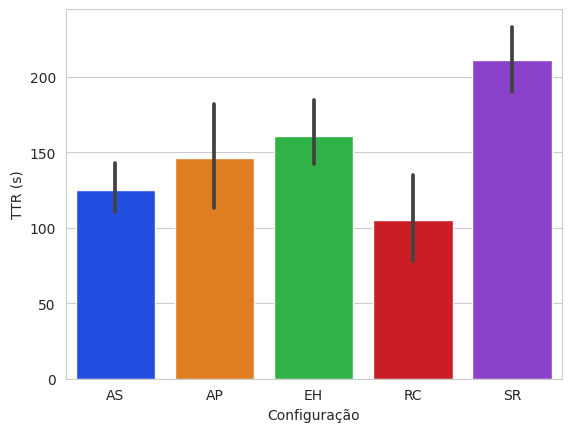

In [33]:
df_225 = df.drop(df[df.number_of_vehicles != 506].index)

# Create the bar graph using seaborn
sns.set_style('whitegrid')
sns.barplot(x='name', y='ambulance_arrival_time', 
            order=['AS', 'AP', 'EH', 'RC', 'SR'], palette=colors, data=df_225)

# Add title and axis labels
plt.xlabel('Configuração')
plt.ylabel('TTR (s)')

# Display the graph
plt.show()

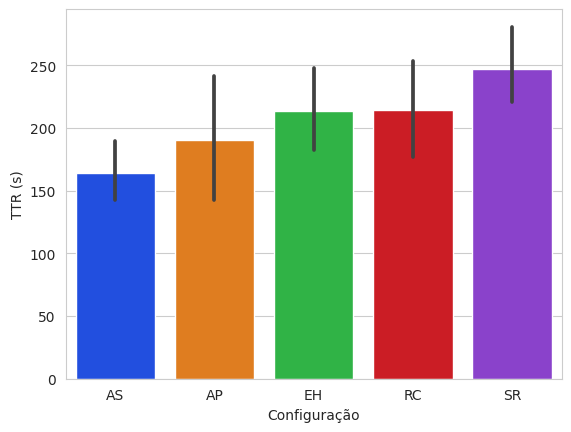

In [34]:
df_350 = df.drop(df[df.number_of_vehicles != 787].index)

# Create the bar graph using seaborn
sns.set_style('whitegrid')
sns.barplot(x='name', y='ambulance_arrival_time',
            order=['AS', 'AP', 'EH', 'RC', 'SR'], palette=colors, data=df_350)

# Add title and axis labels
plt.xlabel('Configuração')
plt.ylabel('TTR (s)')

# Display the graph
plt.show()

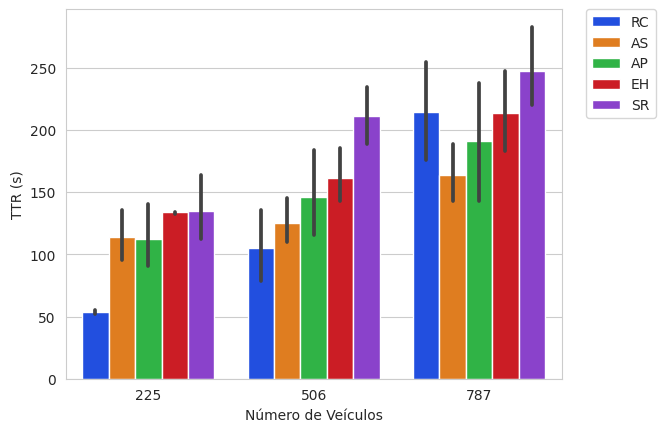

In [35]:
# Create the bar graph using seaborn
sns.barplot(x='number_of_vehicles', y='ambulance_arrival_time',hue='name', palette=colors, data=df)

# Add title and axis labels
plt.xlabel('Número de Veículos')
plt.ylabel('TTR (s)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Display the graph
plt.show()